In [2]:
# Importing Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Supervised Learning and feature enginering Libraries
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Unsupervised Learning Libraries
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

# Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [3]:
df = pd.read_csv('Meetup_data_27_11_2024.csv')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191 entries, 0 to 1190
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   eventurl         1191 non-null   object 
 1   imageurl         1191 non-null   object 
 2   eventname        1191 non-null   object 
 3   description      1191 non-null   object 
 4   attendees        1191 non-null   float64
 5   day              1191 non-null   object 
 6   date             1191 non-null   object 
 7   time             1191 non-null   object 
 8   timezone         1191 non-null   object 
 9   eventtype        1191 non-null   object 
 10  attendees_range  1191 non-null   object 
dtypes: float64(1), object(10)
memory usage: 102.5+ KB
None


In [4]:
df.head()

,eventurl,imageurl,eventname,description,attendees,day,date,time,timezone,eventtype,attendees_range
0,https://www.meetup.com/toronto-spiritual-exper...,https://secure.meetupstatic.com/photos/event/b...,Awaken to Higher Consciousness -- Tune into...,The Toronto Spiritual Experiences Group - Ecka...,9.0,Sunday,2024-11-03,08:15 PM,EST,Inperson,1-10
1,https://www.meetup.com/drink-draw-toronto/even...,https://secure.meetupstatic.com/photos/event/8...,Drink & Draw Toronto #61: November Vibes 🍂 🍵 🍁 ☕,Drink and Draw Toronto,27.0,Monday,2024-11-04,08:00 PM,EST,Inperson,10-50
2,https://www.meetup.com/toronto-soccer-meetup/e...,https://secure.meetupstatic.com/photos/event/d...,"Cherry Beach: Soccer, 11 a side *READ DETAILS*",Toronto Soccer Meetup,3.0,Monday,2024-11-04,08:00 PM,EST,Inperson,1-10
3,https://www.meetup.com/cocktails-coffee/events...,https://secure.meetupstatic.com/photos/event/b...,Cocktails: Get Well,Cocktails and Coffee,10.0,Monday,2024-11-04,07:30 PM,EST,Inperson,10-50
4,https://www.meetup.com/improve-your-relationsh...,https://secure.meetupstatic.com/photos/event/1...,How To Be More Extroverted And Expand Your Soc...,"Improve Your Relationship, Washington DC",16.0,Monday,2024-11-04,07:00 PM,EST,Inperson,10-50


In [5]:
sorted_df = df

In [6]:
sorted_df = sorted_df.dropna(subset=['attendees'])

# EDA

In [7]:
print(sorted_df.describe(include='all'))

                                                 eventurl  \
count                                                1191   
unique                                               1191   
top     https://www.meetup.com/toronto-spiritual-exper...   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                 imageurl  \
count                                                1191   
unique                                                951   
top     https://secure.meetupstatic.com/photos/event/2...   
freq                   

In [8]:
print(sorted_df.isnull().sum())

eventurl           0
imageurl           0
eventname          0
description        0
attendees          0
day                0
date               0
time               0
timezone           0
eventtype          0
attendees_range    0
dtype: int64


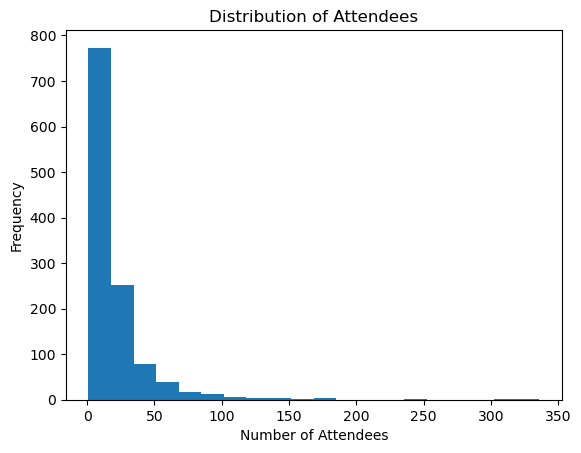

In [9]:

plt.hist(sorted_df['attendees'].dropna(), bins=20)
plt.xlabel("Number of Attendees")
plt.ylabel("Frequency")
plt.title("Distribution of Attendees")
plt.show()

In [10]:
# Replace 'Inpreson' with 'Inperson' in the 'eventtype' column
sorted_df['eventtype'] = sorted_df['eventtype'].replace('Inpreson', 'Inperson')

eventtype
Inperson        663
Online Event    520
Hybrid Event      8
Name: count, dtype: int64


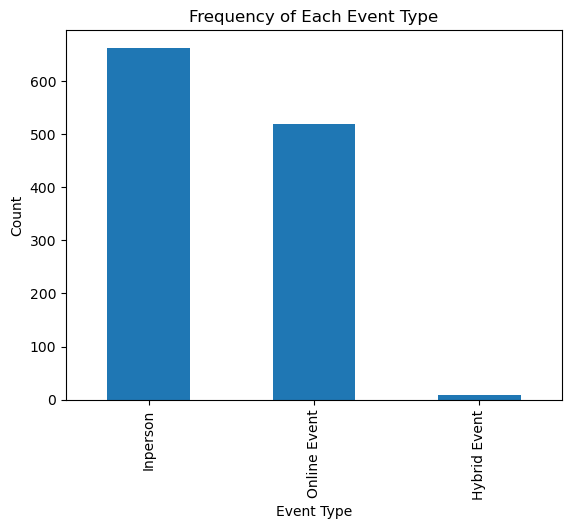

In [11]:
event_counts = sorted_df['eventtype'].value_counts()
print(event_counts)
event_counts.plot(kind='bar', title="Frequency of Each Event Type")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.show()

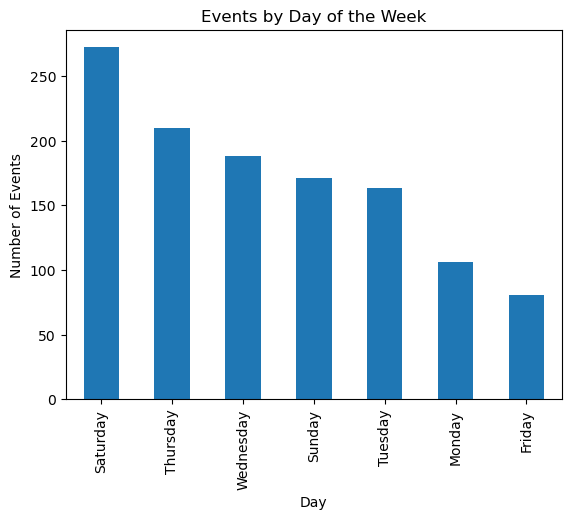

In [12]:
day_counts = sorted_df['day'].value_counts()
day_counts.plot(kind='bar', title="Events by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Number of Events")
plt.show()

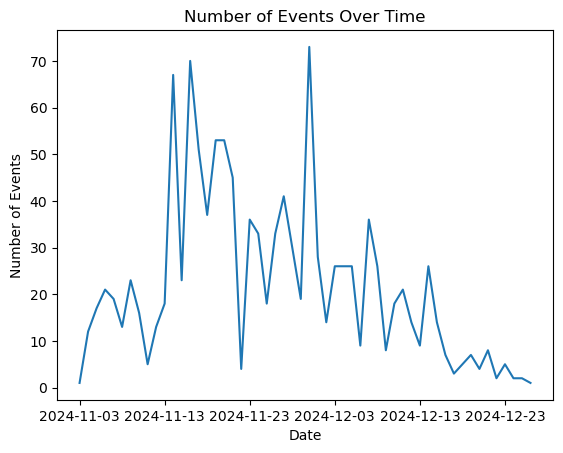

In [13]:
sorted_df.groupby('date').size().plot(title="Number of Events Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Events")
plt.show()

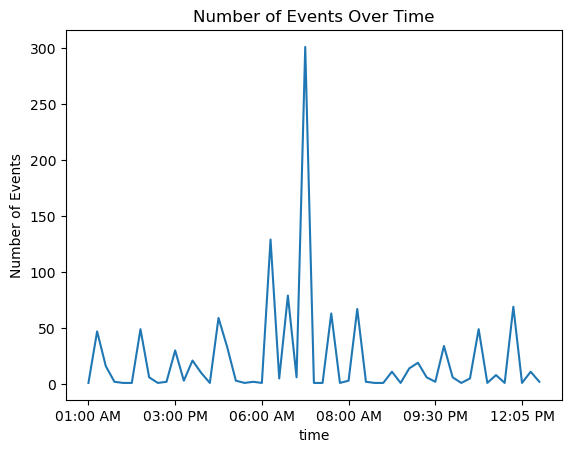

In [14]:
sorted_df.groupby('time').size().plot(title="Number of Events Over Time")
plt.xlabel("time")
plt.ylabel("Number of Events")
plt.show()

In [15]:


# Define new bins and labels
bins = [0, 10, 50, 100, float('inf')]
labels = ['1-10', '10-50', '50-100', '100+']

# Create the new column using pd.cut
sorted_df['attendees_range'] = pd.cut(sorted_df['attendees'], bins=bins, labels=labels, right=False)

# Display the first 5 rows to confirm the changes
sorted_df.head(5)

,eventurl,imageurl,eventname,description,attendees,day,date,time,timezone,eventtype,attendees_range
0,https://www.meetup.com/toronto-spiritual-exper...,https://secure.meetupstatic.com/photos/event/b...,Awaken to Higher Consciousness -- Tune into...,The Toronto Spiritual Experiences Group - Ecka...,9.0,Sunday,2024-11-03,08:15 PM,EST,Inperson,1-10
1,https://www.meetup.com/drink-draw-toronto/even...,https://secure.meetupstatic.com/photos/event/8...,Drink & Draw Toronto #61: November Vibes 🍂 🍵 🍁 ☕,Drink and Draw Toronto,27.0,Monday,2024-11-04,08:00 PM,EST,Inperson,10-50
2,https://www.meetup.com/toronto-soccer-meetup/e...,https://secure.meetupstatic.com/photos/event/d...,"Cherry Beach: Soccer, 11 a side *READ DETAILS*",Toronto Soccer Meetup,3.0,Monday,2024-11-04,08:00 PM,EST,Inperson,1-10
3,https://www.meetup.com/cocktails-coffee/events...,https://secure.meetupstatic.com/photos/event/b...,Cocktails: Get Well,Cocktails and Coffee,10.0,Monday,2024-11-04,07:30 PM,EST,Inperson,10-50
4,https://www.meetup.com/improve-your-relationsh...,https://secure.meetupstatic.com/photos/event/1...,How To Be More Extroverted And Expand Your Soc...,"Improve Your Relationship, Washington DC",16.0,Monday,2024-11-04,07:00 PM,EST,Inperson,10-50


# Modelling

## Feature Engeneering

In [16]:
# List of categorical features to encode
categorical_features = ['eventtype', 'day', 'timezone']

# Create a LabelEncoder object
le = LabelEncoder()

# Encode each categorical feature
for feature in categorical_features:
    sorted_df[feature] = le.fit_transform(sorted_df[feature])


In [17]:
# Ensure 'date' column is in datetime format
sorted_df['date'] = pd.to_datetime(sorted_df['date'], errors='coerce')

# Check for invalid datetime conversions
if sorted_df['date'].isnull().any():
    print("Warning: Some rows in 'date' column could not be converted to datetime.")

# Extract numerical features from 'date'
sorted_df['day_of_week'] = sorted_df['date'].dt.dayofweek  # 0=Monday, 6=Sunday
sorted_df['month'] = sorted_df['date'].dt.month  # Month as integer

# Ensure 'time' column is in datetime format
sorted_df['time'] = pd.to_datetime(sorted_df['time'], errors='coerce')

# Check for invalid time conversions
if sorted_df['time'].isnull().any():
    print("Warning: Some rows in 'time' column could not be converted to datetime.")

# Extract 'hour' from the 'time' column
sorted_df['hour'] = sorted_df['time'].dt.hour

# Function to categorize time of day
def categorize_time_of_day(hour):
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    elif 18 <= hour < 22:
        return 'evening'
    else:
        return 'night'

# Apply the categorization function
sorted_df['time_of_day'] = sorted_df['hour'].apply(categorize_time_of_day)

# Initialize and apply LabelEncoder to 'time_of_day'
le = LabelEncoder()
sorted_df['time_of_day'] = le.fit_transform(sorted_df['time_of_day'])

# Display the updated dataframe
print(sorted_df[['date', 'day_of_week', 'month', 'hour', 'time_of_day']].head())

        date  day_of_week  month  hour  time_of_day
0 2024-11-03            6     11    20            1
1 2024-11-04            0     11    20            1
2 2024-11-04            0     11    20            1
3 2024-11-04            0     11    19            1
4 2024-11-04            0     11    19            1


/var/folders/8m/v3pstdcj6rn30rtdrjzmdwm40000gn/T/ipykernel_34602/806579618.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sorted_df['time'] = pd.to_datetime(sorted_df['time'], errors='coerce')


## Supervised Learning

In [18]:

# Define features (X) and target (y)
X = sorted_df[['eventtype', 'day_of_week', 'month', 'hour', 'time_of_day', 'timezone', 'day']]
y = sorted_df['attendees_range']

#Initialize LabelEncoder for the target variable
target_encoder = LabelEncoder()

# Ensure the target variable is encoded correctly
if sorted_df['attendees_range'].dtype == 'object' or sorted_df['attendees_range'].dtype.name == 'category':
    sorted_df['attendees_range'] = sorted_df['attendees_range'].astype(str)  # Ensure consistent type

# Encode the target variable
y = target_encoder.fit_transform(sorted_df['attendees_range'])

# Calculate class weights after ensuring consistent data type
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = dict(enumerate(class_weights))

# Standardize numerical features
scaler = StandardScaler()
X['hour'] = scaler.fit_transform(X[['hour']])

# Calculate class weights for imbalanced target
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = dict(enumerate(class_weights))

# Split the data again after transformations
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
xgb_tuner = RandomizedSearchCV(
    xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y)), random_state=42),
    param_distributions=xgb_param_grid,
    n_iter=50,
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42
)
xgb_tuner.fit(X_train, y_train)
best_xgb = xgb_tuner.best_estimator_

# Hyperparameter tuning for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_tuner = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight=class_weight_dict),
    param_grid=rf_param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1
)
rf_tuner.fit(X_train, y_train)
best_rf = rf_tuner.best_estimator_

# Hyperparameter tuning for Decision Tree
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}
dt_tuner = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=dt_param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1
)
dt_tuner.fit(X_train, y_train)
best_dt = dt_tuner.best_estimator_

# Evaluate the tuned models
xgb_pred = best_xgb.predict(X_test)
rf_pred = best_rf.predict(X_test)
dt_pred = best_dt.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

print("\nXGBoost Classification Report:\n", classification_report(y_test, xgb_pred, target_names=target_encoder.classes_))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_pred, target_names=target_encoder.classes_))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, dt_pred, target_names=target_encoder.classes_))


/var/folders/8m/v3pstdcj6rn30rtdrjzmdwm40000gn/T/ipykernel_34602/1457379172.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['hour'] = scaler.fit_transform(X[['hour']])


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 72 candidates, totalling 216 fits
XGBoost Accuracy: 0.6527196652719666
Random Forest Accuracy: 0.4560669456066946
Decision Tree Accuracy: 0.6150627615062761

XGBoost Classification Report:
               precision    recall  f1-score   support

        1-10       0.72      0.51      0.60       100
       10-50       0.62      0.86      0.72       122
        100+       0.00      0.00      0.00         2
      50-100       0.00      0.00      0.00        15

    accuracy                           0.65       239
   macro avg       0.34      0.34      0.33       239
weighted avg       0.62      0.65      0.62       239


Random Forest Classification Report:
               precision    recall  f1-score   support

        1-10       0.58      0.45      0.51       100
       10-50       0.60      0.47      0.53       122
        100+       0.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

In [19]:
# Define features (X) and target (y)
X = sorted_df[['eventtype', 'day_of_week', 'month', 'hour', 'time_of_day', 'timezone', 'day']]

# Initialize LabelEncoder for the target variable
target_encoder = LabelEncoder()

# Ensure the target variable is encoded correctly
if sorted_df['attendees_range'].dtype == 'object' or sorted_df['attendees_range'].dtype.name == 'category':
    sorted_df['attendees_range'] = sorted_df['attendees_range'].astype(str)  # Ensure consistent type

# Encode the target variable
y = target_encoder.fit_transform(sorted_df['attendees_range'])

# Standardize numerical features
scaler = StandardScaler()
X['hour'] = scaler.fit_transform(X[['hour']])

# Split the data before oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
xgb_tuner = RandomizedSearchCV(
    xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y)), random_state=42),
    param_distributions=xgb_param_grid,
    n_iter=50,
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42
)
xgb_tuner.fit(X_train, y_train)
best_xgb = xgb_tuner.best_estimator_

# Hyperparameter tuning for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_tuner = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1
)
rf_tuner.fit(X_train, y_train)
best_rf = rf_tuner.best_estimator_

# Hyperparameter tuning for Decision Tree
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}
dt_tuner = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=dt_param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1
)
dt_tuner.fit(X_train, y_train)
best_dt = dt_tuner.best_estimator_

# Evaluate the tuned models
xgb_pred = best_xgb.predict(X_test)
rf_pred = best_rf.predict(X_test)
dt_pred = best_dt.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

print("\nXGBoost Classification Report:\n", classification_report(y_test, xgb_pred, target_names=target_encoder.classes_))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_pred, target_names=target_encoder.classes_))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, dt_pred, target_names=target_encoder.classes_))


/var/folders/8m/v3pstdcj6rn30rtdrjzmdwm40000gn/T/ipykernel_34602/2183068648.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['hour'] = scaler.fit_transform(X[['hour']])


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 72 candidates, totalling 216 fits
XGBoost Accuracy: 0.6527196652719666
Random Forest Accuracy: 0.6234309623430963
Decision Tree Accuracy: 0.6150627615062761

XGBoost Classification Report:
               precision    recall  f1-score   support

        1-10       0.72      0.51      0.60       100
       10-50       0.62      0.86      0.72       122
        100+       0.00      0.00      0.00         2
      50-100       0.00      0.00      0.00        15

    accuracy                           0.65       239
   macro avg       0.34      0.34      0.33       239
weighted avg       0.62      0.65      0.62       239


Random Forest Classification Report:
               precision    recall  f1-score   support

        1-10       0.63      0.52      0.57       100
       10-50       0.62      0.78      0.69       122
        100+       0.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

## Unsupervised Learning

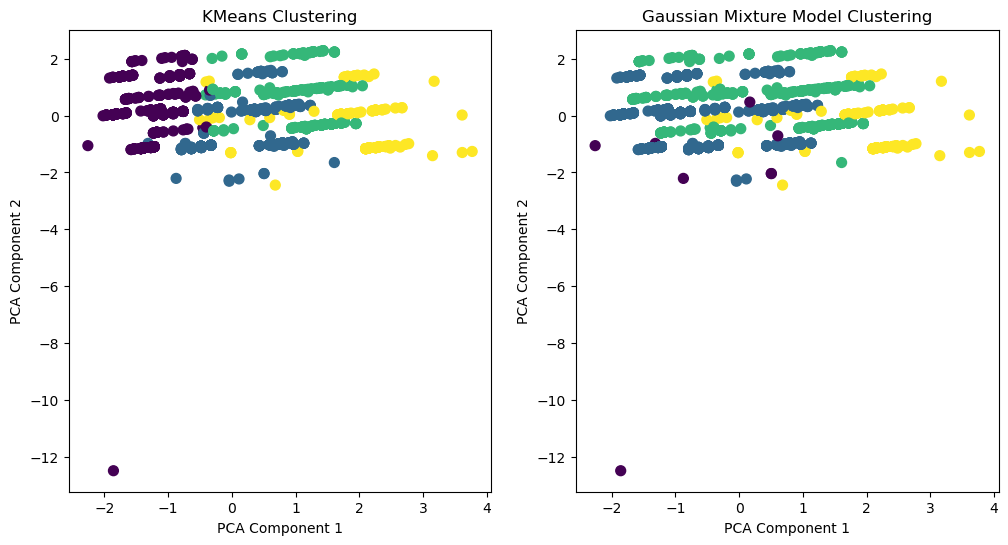

                                            eventurl  \
0  https://www.meetup.com/toronto-spiritual-exper...   
1  https://www.meetup.com/drink-draw-toronto/even...   
2  https://www.meetup.com/toronto-soccer-meetup/e...   
3  https://www.meetup.com/cocktails-coffee/events...   
4  https://www.meetup.com/improve-your-relationsh...   

                                            imageurl  \
0  https://secure.meetupstatic.com/photos/event/b...   
1  https://secure.meetupstatic.com/photos/event/8...   
2  https://secure.meetupstatic.com/photos/event/d...   
3  https://secure.meetupstatic.com/photos/event/b...   
4  https://secure.meetupstatic.com/photos/event/1...   

                                           eventname  \
0  Awaken to Higher Consciousness   --  Tune into...   
1   Drink & Draw Toronto #61: November Vibes 🍂 🍵 🍁 ☕   
2     Cherry Beach: Soccer, 11 a side *READ DETAILS*   
3                                Cocktails: Get Well   
4  How To Be More Extroverted And Expand Your 

In [38]:
# Step 1: Prepare the features (X)
X = sorted_df[['eventtype', 'day_of_week', 'month', 'hour', 'time_of_day', 'timezone', 'day']]

# Step 2: Normalize the data for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply Principal Component Analysis (optional for visualization)
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

# Step 4: KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Assuming 4 clusters for attendance ranges
kmeans_labels = kmeans.fit_predict(X_scaled)

# Step 5: Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=4, random_state=42)  # Assuming 4 clusters for attendance ranges
gmm_labels = gmm.fit_predict(X_scaled)

# Step 6: Visualize Clusters (using PCA for 2D representation)
plt.figure(figsize=(12, 6))

# KMeans Clusters
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('KMeans Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# GMM Clusters
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis', s=50)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.show()

# Step 7: Analyze Clusters
sorted_df['KMeans_Cluster'] = kmeans_labels
sorted_df['GMM_Cluster'] = gmm_labels

# Display a few rows with cluster assignments
print(sorted_df.head())


## Deep Learning

In [39]:


# Convert the target variable to categorical (one-hot encoding)
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Define the deep learning model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y)), activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_categorical, 
                    validation_data=(X_test, y_test_categorical), 
                    epochs=50,  # Adjust epochs based on training time and accuracy
                    batch_size=32, 
                    verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)
print(f"Deep Learning Model Accuracy: {accuracy:.2f}")

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print("\nDeep Learning Classification Report:\n", classification_report(y_test, y_pred_classes, target_names=target_encoder.classes_))


Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2301 - loss: 2.4113 - val_accuracy: 0.5063 - val_loss: 0.9658
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5238 - loss: 1.1117 - val_accuracy: 0.5439 - val_loss: 0.9294
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5378 - loss: 1.0165 - val_accuracy: 0.5063 - val_loss: 0.9280
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4920 - loss: 0.9894 - val_accuracy: 0.5063 - val_loss: 0.9329
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5372 - loss: 0.9835 - val_accuracy: 0.5941 - val_loss: 0.9108
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5604 - loss: 0.9655 - val_accuracy: 0.5105 - val_loss: 0.9244
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5324 - loss: 1.0187 - val_accuracy: 0.5481 - val_loss: 0.9153
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5388 - loss: 0.9967 - val_accuracy: 0.5105 - val_loss: 0.9165
Epo

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5445 - loss: 0.9736 - val_accuracy: 0.5900 - val_loss: 0.8628 - learning_rate: 0.0010
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5928 - loss: 0.8765 - val_accuracy: 0.5941 - val_loss: 0.8723 - learning_rate: 0.0010
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5783 - loss: 0.8892 - val_accuracy: 0.5941 - val_loss: 0.8752 - learning_rate: 0.0010
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5499 - loss: 0.8954 - val_accuracy: 0.5941 - val_loss: 0.8819 - learning_rate: 0.0010
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5975 - loss: 0.8711 - val_accuracy: 0.6234 - val_loss: 0.8733 - learning_rate: 0.0010
Epoch 6/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6250 - loss: 0.9389
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5822 - loss: 0.9128 - val_accuracy: 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


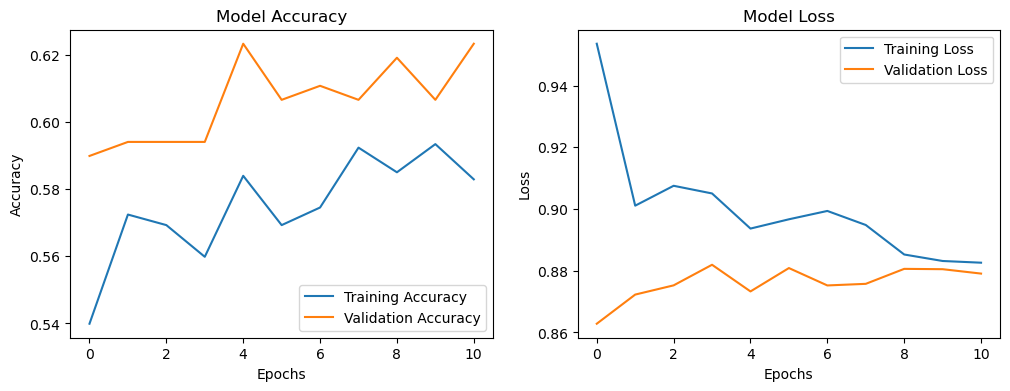

In [40]:
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# Learning rate reduction on plateau
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Train the model with callbacks
history = model.fit(X_train_scaled, y_train_categorical, 
                    validation_data=(X_test_scaled, y_test_categorical), 
                    epochs=50, 
                    batch_size=32, 
                    callbacks=[early_stopping, lr_reduction],
                    verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=0)
print(f"Deep Learning Model Accuracy: {accuracy:.2f}")

# Predictions
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print("\nDeep Learning Classification Report:\n", classification_report(y_test, y_pred_classes, target_names=target_encoder.classes_))

# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Conclusion

We belive the suprevised learning model (XGBoost) has performed well in predicting the attendence with an accuracy of 65.2% overall.